# Day 1 Enron Text mining exercise
[![Author - DanRamirez](https://img.shields.io/badge/Author-DanRamirez-2ea44f?style=for-the-badge)](https://github.com/Dandata0101)
![Python - Version](https://img.shields.io/badge/PYTHON-3.11-red?style=for-the-badge&logo=python&logoColor=white)
[![Project Repo](https://img.shields.io/badge/Our_Project_Repo-Visit-blue?style=for-the-badge&logo=github&logoColor=white)](https://github.com/Dandata0101/mbs-fraud-detection)

## Enron Corporation: A Brief History

### Rise
- **1985-1990**: Formed from the merger of Houston Natural Gas and InterNorth, with Kenneth Lay as CEO. Initially, it operated gas pipelines.
- **1990s**: Diversified into electricity trading, water, and broadband services, pioneering energy-related financial products. Named "America's Most Innovative Company" by Fortune magazine from 1996 to 2001.

### Fall
- **Accounting Scandals**: Practices of hiding debts and inflating profits through special purpose entities led to financial misrepresentation.
- **Bankruptcy**: Filed on December 2, 2001, it was then the largest bankruptcy in U.S. history, leading to significant shareholder and employee losses.
- **Legal Repercussions**: Led to the Sarbanes-Oxley Act of 2002, aimed at increasing financial transparency in publicly traded companies. High-ranking executives, including Jeffrey Skilling and Andrew Fastow, were convicted of fraud and conspiracy.

### Impact
Enron's collapse underscored the critical need for corporate governance, ethics, and regulatory oversight, serving as a cautionary tale in the business world.

## Enron Email Analysis

This Python script is designed to perform an analysis on a dataset of emails, specifically focusing on identifying and visualizing emails related to selling Enron stock. The analysis is carried out through several key functions, each encapsulating a unique part of the process.

### Features

- **Filtering Emails**: The script filters emails containing specific search terms related to selling Enron stock, using pandas for data manipulation.
- **Unique Senders**: Identifies unique senders within the filtered emails, showcasing the variety of sources discussing the search terms.
- **Flagging Emails**: Adds a flag to the dataset for emails that match the search criteria, aiding in quick identification of relevant data points.
- **Rich Display**: Utilizes the `rich` library to display filtered emails and statistics in a visually appealing manner within the console, including a detailed table of the first few filtered emails and a summary of flagged emails.
- **Word Cloud Visualization**: Generates a word cloud from the content of the filtered emails, providing a graphical representation of the most frequent terms related to the topic of interest.

### Usage

To run the script, ensure you have a CSV file containing your email dataset with at least the following columns: `Message-ID`, `From`, `To`, `Date`, and `clean_content`. Adjust the `csv_file_path` and `search_terms` variables as necessary to match your dataset and analysis focus.

### Installation

This script requires Python 3.x and the following libraries: `pandas`, `rich`, `matplotlib`,  `wordcloud` and `openai` You can install these dependencies using `pip`:

```sh
pip install pandas rich matplotlib wordcloud openai



# Data file import

In [13]:
import pandas as pd
import os

# Define file path
current_directory = os.getcwd()
csv_file_path = current_directory+ '/01-data/FD_01_enron.csv'

# Read CSV file into DataFrame
df = pd.read_csv(csv_file_path)

# Function Calls

Unique Senders in Filtered Emails:

- ('sarah.palmer@enron.com')

Flagged Emails Count:

┏━━━━━━┳━━━━━━━┓
┃ Flag ┃ Count ┃
┡━━━━━━╇━━━━━━━┩
│ 0    │  2089 │
│ 1    │     1 │
└──────┴───────┘

Filtered Email(s):

╭──────────────────────┬──────────────────────┬──────────────────────┬─────────────────────┬──────────────────────╮
│ Message-ID           │ From                 │ To                   │ Date                │ Content              │
├──────────────────────┼──────────────────────┼──────────────────────┼─────────────────────┼──────────────────────┤
│ <6336501.10758411543 │ ('sarah.palmer@enro… │ ('sarah.palmer@enron │ 2002-02-01 14:53:35 │ joint venture enron  │
│ 11.JavaMail.evans@th │                      │ .com')               │                     │ meeting belies       │
│ yme>                 │                      │                      │                     │ officers claims th e │
│                      │                      │                      │                     │ dark minutes show    │
│                      │                      │                      │                     │ hearing novel        │
│                      │                      │                      │                     │ partnerships         │
│                      │                      │                      │                     │ inflated ea rnings   │
│                      │                      │                      │                     │ present lay skilling │
│                      │                      │                      │                     │ fastow wall street   │
│                      │                      │                      │                     │ journal ex enron ceo │
│                      │                      │                      │                     │ agrees testify panel │
│                      │                      │                      │                     │ energy appearance    │
│                      │                      │                      │                     │ skilling called      │
│                      │                      │                      │                     │ critical chairman    │
│                      │                      │                      │                     │ subcommittee looking │
│                      │                      │                      │                     │ firm downfall los    │
│                      │                      │                      │                     │ angeles...           │
╰──────────────────────┴──────────────────────┴──────────────────────┴─────────────────────┴──────────────────────╯

Summary
"The text provides a detailed overview of the Enron scandal, detailing various aspects such as the joint venture meeting, inflated earnings, executive testimonies, congressional hearings, refusal to cooperate, financial losses, involvement of major financial institutions like J.P. Morgan, regulatory focus on Enron's role in the California energy crisis, and the scrutiny faced by Enron's auditors and lawyers. The scandal also involved accusations of collusion, poor financial advice, asset listings, luxury expenditures, and potential legal implications for Enron officers and other parties involved. Overall, the Enron scandal was a complex situation involving financial mismanagement, unethical practices, and regulatory oversight issues."


None


Generating and displaying word cloud for filtered emails

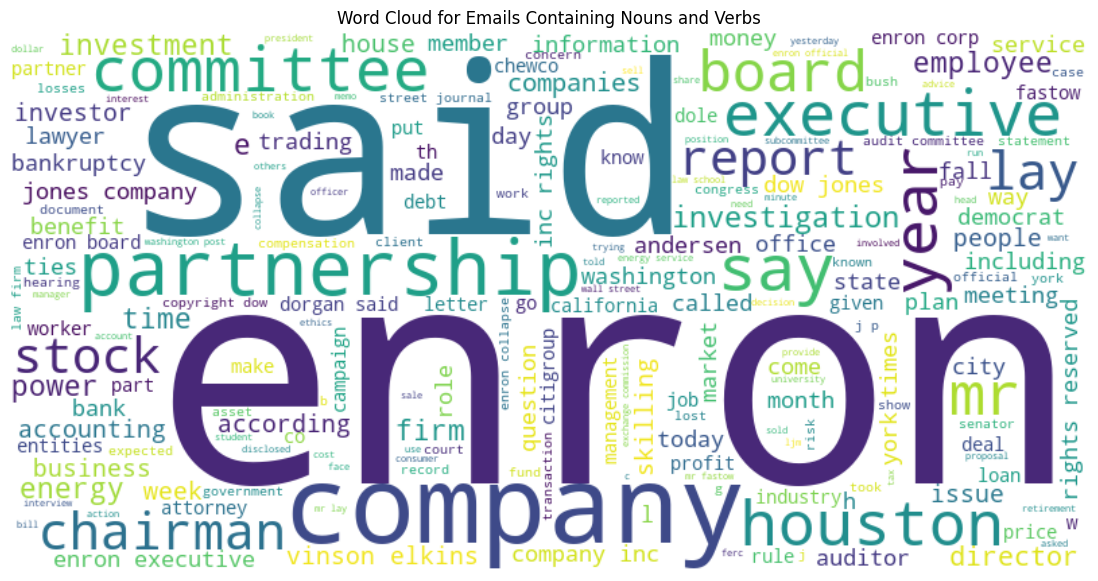

In [14]:
from scripts.emailfx import print_unique_senders,display_flagged_email_count,display_email_table,generate_display_wordcloud
# Define search terms and filter rows
search_terms = ['sell enron stock']


filtered_emails = df[df['clean_content'].str.contains('|'.join(search_terms), na=False)]
# Set flag for matching search terms
df['flag'] = df['clean_content'].str.contains('|'.join(search_terms), na=False).astype(int)
    
print_unique_senders(filtered_emails)
display_flagged_email_count(df)
display_email_table(filtered_emails)

# Load the environment variables from the .env file
from dotenv import load_dotenv
load_dotenv()

openaikey = os.environ.get("openaikey")

from scripts.emailsummary import summarize_text_column_with_openai_chat
summary = summarize_text_column_with_openai_chat( filtered_emails['clean_content'],openaikey)
print(summary)

# Combine content for word cloud
text_for_wordcloud = " ".join(email for email in filtered_emails['clean_content'].dropna())
generate_display_wordcloud(text_for_wordcloud)
